In [4]:
import pandas as pd

In [6]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv("Airbnb_data.csv")

# Display the first few rows to check if the data is loaded correctly
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


1. Data Exploration and Processing

In [8]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [10]:
# Display summary statistics for numerical features
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [16]:
# Count missing values in each column
missing_values = df.isnull().sum()

# Show only columns with missing values
missing_values = missing_values[missing_values > 0]

# Print missing values
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 bathrooms                   200
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
last_review               15827
neighbourhood              6872
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64


In [18]:
# Display unique counts for categorical variables
categorical_cols = df.select_dtypes(include=["object"]).columns  # Select text-based columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

property_type: 35 unique values
room_type: 3 unique values
amenities: 67122 unique values
bed_type: 5 unique values
cancellation_policy: 5 unique values
city: 6 unique values
description: 73474 unique values
first_review: 2554 unique values
host_has_profile_pic: 2 unique values
host_identity_verified: 2 unique values
host_response_rate: 80 unique values
host_since: 3087 unique values
instant_bookable: 2 unique values
last_review: 1371 unique values
name: 73331 unique values
neighbourhood: 619 unique values
thumbnail_url: 65883 unique values
zipcode: 668 unique values


In [22]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [26]:
import numpy as np

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0]

# Check for outliers in all numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
outlier_counts = {col: detect_outliers_iqr(df, col) for col in numeric_cols}

# Display columns with outliers
outlier_counts = {k: v for k, v in outlier_counts.items() if v > 0}
print("Columns with outliers and their counts:", outlier_counts)

Columns with outliers and their counts: {'log_price': 1532, 'accommodates': 3604, 'bathrooms': 15812, 'number_of_reviews': 8203, 'review_scores_rating': 1719, 'bedrooms': 24236, 'beds': 5686}


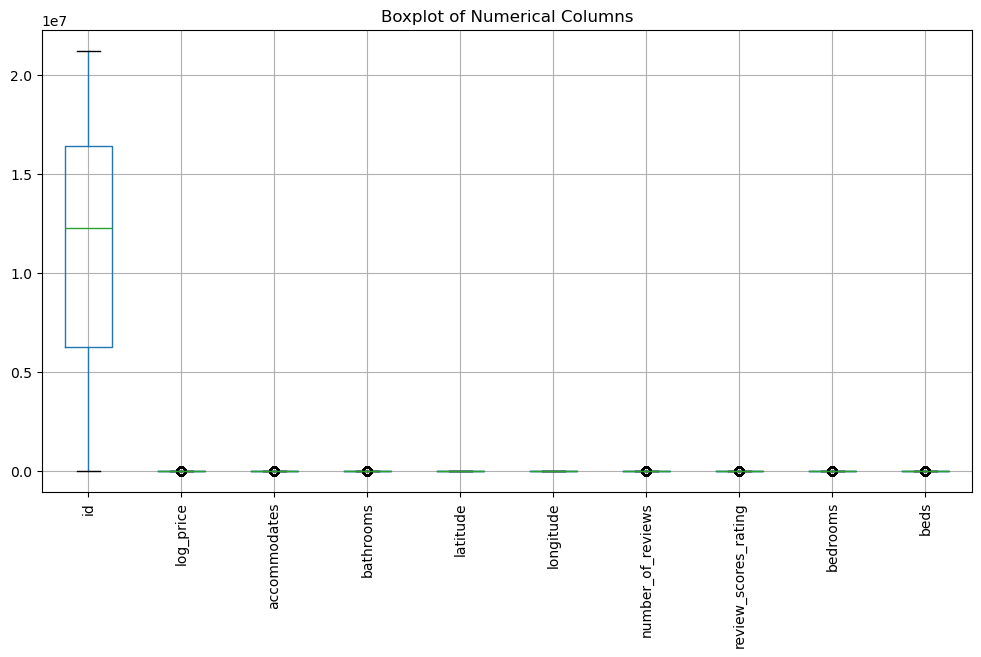

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for numerical columns
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot(rot=90)
plt.title("Boxplot of Numerical Columns")
plt.show()

In [30]:
# Function to cap outliers using IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply capping on all numerical columns with outliers
for col in outlier_counts.keys():
    cap_outliers(df, col)

print("Outliers handled using capping method.")

Outliers handled using capping method.


Feature Engineering

In [77]:
# Count the number of amenities
df['amenities_count'] = df['amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

In [73]:
df['price_per_accommodate'] = df['log_price'] / df['accommodates']

In [79]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,last_review_day,first_review_year,first_review_month,first_review_day,host_since_year,host_since_month,host_since_day,host_tenure,amenities_count,price_per_accommodate
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3.0,1.0,Real Bed,strict,True,...,18.0,2016.0,6.0,18.0,2012.0,3.0,26.0,13.0,9,1.670212
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7.0,1.0,Real Bed,strict,True,...,23.0,2017.0,8.0,5.0,2017.0,6.0,19.0,8.0,15,0.732843
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5.0,1.0,Real Bed,moderate,True,...,14.0,2017.0,4.0,30.0,2016.0,10.0,25.0,9.0,19,0.995347
3,13418779,6.574657,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4.0,1.0,Real Bed,flexible,True,...,NaN,2016.0,NaN,NaN,2015.0,4.0,19.0,10.0,15,1.643664
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2.0,1.0,Real Bed,moderate,True,...,22.0,2015.0,5.0,12.0,2015.0,3.0,1.0,10.0,12,2.372466


Categorical Encoding

In [82]:
# Get categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['property_type', 'room_type', 'amenities', 'bed_type',
       'cancellation_policy', 'city', 'description', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'name', 'neighbourhood', 'thumbnail_url', 'zipcode'],
      dtype='object')


In [98]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding
label_encoder = LabelEncoder()
df['cancellation_policy_encoded'] = label_encoder.fit_transform(df['cancellation_policy'])

print(df[['cancellation_policy', 'cancellation_policy_encoded']].head()) # Check results

  cancellation_policy  cancellation_policy_encoded
0              strict                            2
1              strict                            2
2            moderate                            1
3            flexible                            0
4            moderate                            1


In [102]:
# Apply one-hot encoding to categorical variables
df = pd.get_dummies(df, columns=['room_type', 'property_type', 'neighbourhood'], drop_first=True)

print("New dataset shape after encoding:", df.shape)

New dataset shape after encoding: (74111, 693)


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Columns: 693 entries, id to neighbourhood_Wrigleyville
dtypes: bool(655), datetime64[ns](3), float64(20), int32(1), int64(2), object(12)
memory usage: 67.5+ MB


Splitting the Dataset for training and testing

In [113]:
from sklearn.model_selection import train_test_split

# Define target variable (Price)
target = 'log_price'  # Change this if you're using log_price

# Select feature columns (all except price)
features = df.drop(columns=[target])

# Target variable
y = df[target]
X = features

# Split into train (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print dataset shapes
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (51877, 692) (51877,)
Validation set: (11117, 692) (11117,)
Test set: (11117, 692) (11117,)


In [117]:
#To check data distribution after splitting
print("Mean price in training set:", y_train.mean())
print("Mean price in validation set:", y_val.mean())
print("Mean price in test set:", y_test.mean())

Mean price in training set: 4.775472175961437
Mean price in validation set: 4.786188232479896
Mean price in test set: 4.768821886160341


Regression Model Development

In [15]:
import pandas as pd

# Load the dataset (update the filename if needed)
df = pd.read_csv("Airbnb_data.csv")  # Use .xlsx if it's an Excel file

# Display first few rows to confirm loading
print(df.head())

         id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed     

Linear Regression Model (next 4 code snippets)

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the target variable
target = 'log_price'  # If using log-transformed price, change to 'log_price'
X = df.drop(columns=[target])  # Features
y = df[target]  # Target

# Ensure only numeric columns remain
X = X.select_dtypes(include=[np.number])

# Fill any remaining missing values with median
X.fillna(X.median(), inplace=True)

# Print dataset info
print("Final dataset shape:", X.shape)
print("Missing values:", X.isnull().sum().sum())  # Should print 0

Final dataset shape: (74111, 9)
Missing values: 0


In [13]:
# Split into train (70%), validation (15%), and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print shapes
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (51877, 9) (51877,)
Validation set: (11117, 9) (11117,)
Test set: (11117, 9) (11117,)


In [15]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform all sets
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print("Feature scaling complete!")

Feature scaling complete!


In [17]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on validation data
y_val_pred = model.predict(X_val)

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"Regression Model RMSE: {rmse:.2f}")
print(f"Regression Model R²: {r2:.4f}")

Regression Model RMSE: 0.57
Regression Model R²: 0.3471


In [19]:
# Get feature importance from model coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print("Top 10 Important Features:")
print(feature_importance.head(10))

Top 10 Important Features:
                Feature  Coefficient
1          accommodates     0.388126
3              latitude     0.156193
7              bedrooms     0.091380
6  review_scores_rating     0.063525
2             bathrooms     0.049129
0                    id    -0.002307
5     number_of_reviews    -0.032630
8                  beds    -0.079982
4             longitude    -0.132299


Random Forest Regression Model

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Step 1: Define target and features
target = 'log_price'  # Update if needed
X = df.drop(columns=[target])
y = df[target]

# Keep only numeric features
X = X.select_dtypes(include=[np.number])

# Fill missing values
X.fillna(X.median(), inplace=True)

# Step 2: Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Train Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Predict Prices on Test Data
y_test_pred = rf_model.predict(X_test)

# Step 5: Evaluate Performance
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

RMSE: 0.44
MAE: 0.32
R²: 0.6320


Re-spliting The Data

In [19]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Define target and features
target = 'log_price'  
X = df.drop(columns=[target])  # Feature matrix
y = df[target]  # Target variable

# Ensure only numeric columns are used
X = X.select_dtypes(include=[np.number])
X.fillna(X.median(), inplace=True)  # Fill missing values

# Split into train (70%), validation (15%), and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check if X_train is created
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (51877, 9)
y_train shape: (51877,)


Hyper Parameter Tuning

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Smaller hyperparameter grid for faster tuning
param_grid = {
    'n_estimators': [100, 200],  # Reduce number of trees
    'max_depth': [10, 15],  # Limit depth to prevent long training times
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2]
}

# Randomized Search with fewer iterations
rf_model = RandomForestRegressor(random_state=42)
rf_cv = RandomizedSearchCV(rf_model, param_grid, cv=2, n_iter=3, scoring='neg_root_mean_squared_error', random_state=42)
rf_cv.fit(X_train[:5000], y_train[:5000])  # Use a sample to speed up tuning

# Best model
best_rf = rf_cv.best_estimator_

# Predict and evaluate
y_test_pred_tuned = best_rf.predict(X_test)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_test_pred_tuned))
mae_tuned = mean_absolute_error(y_test, y_test_pred_tuned)
r2_tuned = r2_score(y_test, y_test_pred_tuned)

print(f"Tuned Model RMSE: {rmse_tuned:.2f}")
print(f"Tuned Model MAE: {mae_tuned:.2f}")
print(f"Tuned Model R²: {r2_tuned:.4f}")

Tuned Model RMSE: 0.46
Tuned Model MAE: 0.35
Tuned Model R²: 0.5875


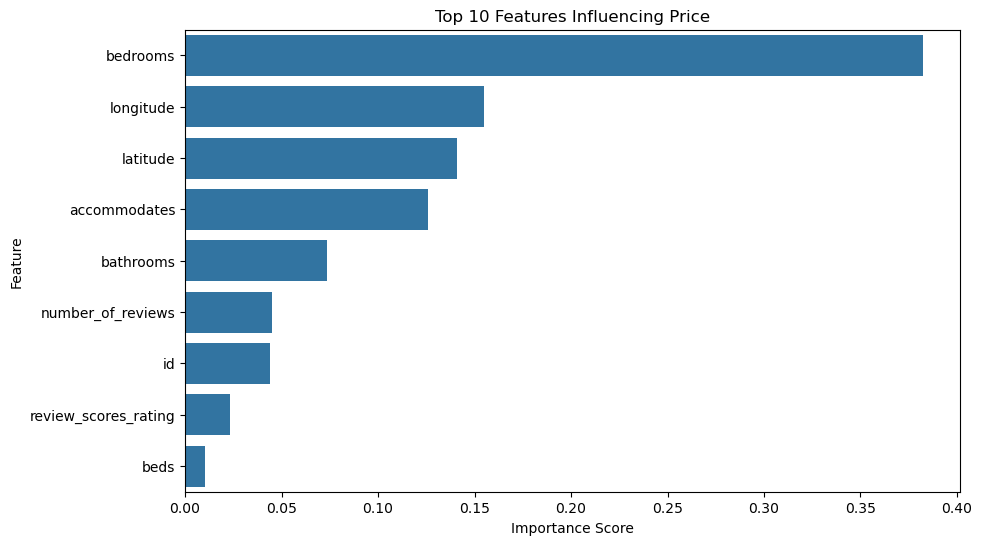

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feature_importance = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot Top 10 Important Features
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Features Influencing Price")
plt.show()

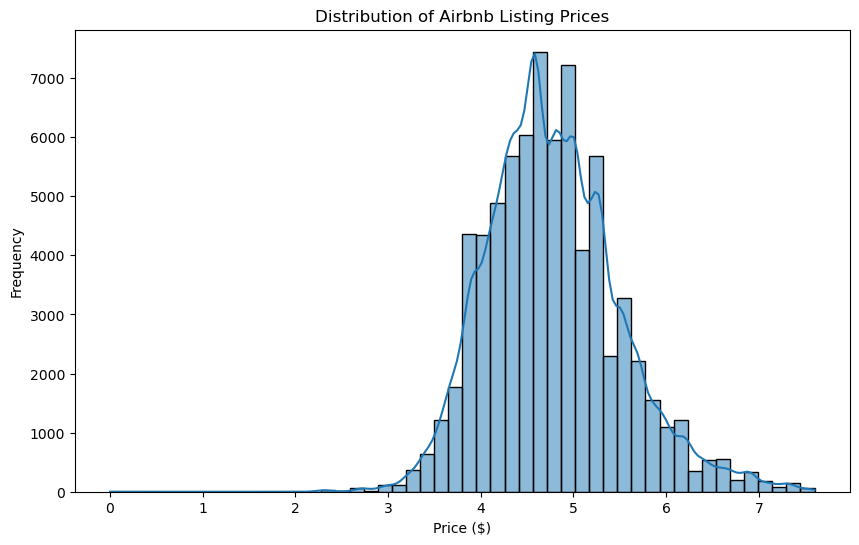

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 6))

# Plot histogram with Kernel Density Estimation (KDE)
sns.histplot(df['log_price'], bins=50, kde=True)

# Add labels and title
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Airbnb Listing Prices')

# Show the plot
plt.show()

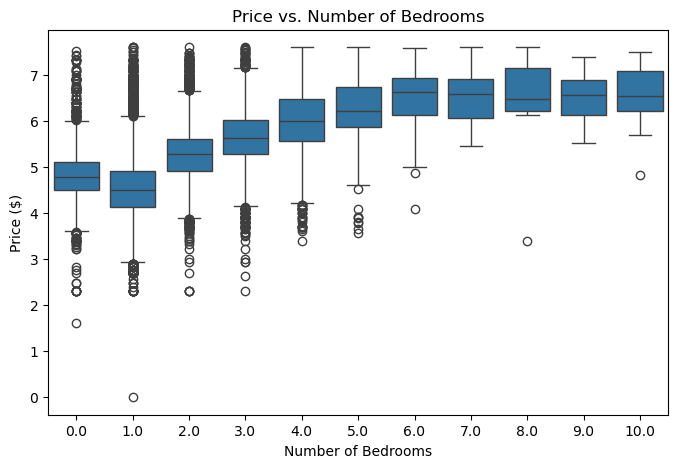

In [33]:
# Set figure size
plt.figure(figsize=(8, 5))

# Boxplot to show price distribution per bedroom count
sns.boxplot(x=df['bedrooms'], y=df['log_price'])

# Add labels and title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)')
plt.title('Price vs. Number of Bedrooms')

# Show the plot
plt.show()